In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import LabelEncoder

from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers, utils

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
categories = ['rec.sport.hockey', 'talk.politics.mideast', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [4]:
twenty_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), 
                                  categories=categories, shuffle=True, random_state=321)

In [6]:
twenty_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), 
                                 categories=categories, shuffle=True, random_state=321)

In [8]:
df_train = pd.DataFrame(list(zip(twenty_train.data, twenty_train.target)), columns=['text', 'label'])
df_train.head()

,text,label
0,\nDr. cheghadr bA namakand! They just wait un...,4
1,\n\n\n\n\n:) No...I was one of the lucky ones....,2
2,\n\n[After a small refresh Hasan got on the tr...,4
3,Before getting excited and implying that I am ...,4
4,I have posted disp135.zip to alt.binaries.pict...,0


In [9]:
df_test = pd.DataFrame(list(zip(twenty_test.data, twenty_test.target)), columns=['text', 'label'])
df_test.head()

,text,label
0,"hi all, Ive applied for the class of 93 at qui...",2
1,:In article <enea1-270493135255@enea.apple.com...,2
2,"\nI don't know the answer the to this one, alt...",0
3,\n\nWe here at IBM have the same problem with ...,0
4,\nI was at an Adobe seminar/conference/propaga...,0


In [10]:
# A function for transforming train or test into tfidf features
def tfidf_features(txt, flag):
    if flag == "train":
        x = tfidf.fit_transform(txt)
    else:
        x = tfidf.transform(txt)
    x = x.astype('float16')
    return x 

tfidf = TfidfVectorizer(binary=True)
X_train = tfidf_features(df_train.text.values, flag="train")
X_test = tfidf_features(df_test.text.values, flag="test")

# With CountVectorizer and without the function
# from sklearn.feature_extraction.text import CountVectorizer
# count_vect = CountVectorizer()
# X_train = count_vect.fit_transform(df_train.text.values)
# X_test = count_vect.transform(df_test.text.values)

In [11]:
X_train.nnz / float(X_train.shape[0])

111.5678340700442

In [12]:
X_test.nnz / float(X_train.shape[0])

75.78748724923496

In [13]:
tfidf.vocabulary_

{'dr': 11831,
 'cheghadr': 7790,
 'ba': 5229,
 'namakand': 23053,
 'they': 33351,
 'just': 19216,
 'wait': 35850,
 'until': 34946,
 'are': 4507,
 'teenagers': 33019,
 'to': 33637,
 'kill': 19570,
 'them': 33280,
 'huh': 17121,
 'yup': 36995,
 'iri': 18569,
 'also': 3839,
 'granted': 15615,
 'great': 15673,
 'deal': 10311,
 'of': 24102,
 'reconstruction': 27894,
 'houses': 17031,
 'and': 4048,
 'buildings': 6819,
 'in': 17695,
 'war': 35900,
 'torn': 33751,
 'areas': 4509,
 'malaysia': 21218,
 'khak': 19512,
 'too': 33713,
 'sareshoon': 29498,
 'one': 24265,
 'the': 33264,
 'only': 24281,
 'industries': 17864,
 'we': 36023,
 'really': 27764,
 'have': 16323,
 'is': 18615,
 'construction': 9123,
 'there': 33323,
 'all': 3748,
 'these': 33341,
 'unemployed': 34686,
 'youth': 36969,
 'give': 15292,
 'money': 22531,
 'do': 11634,
 'what': 36180,
 'iranians': 18556,
 'can': 7145,
 'should': 30510,
 'be': 5586,
 'doing': 11683,
 'no': 23621,
 'was': 35945,
 'lucky': 20918,
 'ones': 24270,
 've

In [14]:
# Converting the list of strings to the matrix of vectors (to be fed neural network models)
# Encode the list of newsgroups into categorical integer values
lb = LabelEncoder()
y = lb.fit_transform(df_train.label.values)
y_train = utils.to_categorical(y)

In [15]:
y = lb.transform(df_test.label.values)
y_test = utils.to_categorical(y)

In [16]:
model = Sequential()
input_dim = X_train.shape[1]  # Number of features
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [17]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                371490    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
Total params: 371,545
Trainable params: 371,545
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512)
# model.save_weights("model.h5")
# print("Saved model to disk")

Epoch 1/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4987 - accuracy: 0.4546
Epoch 2/20
6/6 [==============================] - 0s 4ms/step - loss: 0.4897 - accuracy: 0.8140
Epoch 3/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.8518
Epoch 4/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4693 - accuracy: 0.8817
Epoch 5/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.8973
Epoch 6/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4474 - accuracy: 0.9089
Epoch 7/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4359 - accuracy: 0.9150
Epoch 8/20
6/6 [==============================] - 0s 4ms/step - loss: 0.4240 - accuracy: 0.9201
Epoch 9/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.9276
Epoch 10/20
6/6 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.9327
Epoch 11/20
6/6 [======================

dict_keys(['loss', 'accuracy'])


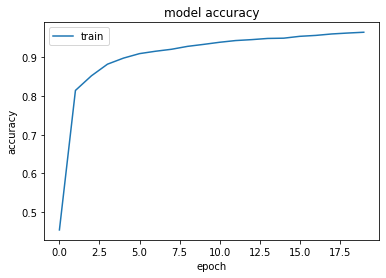

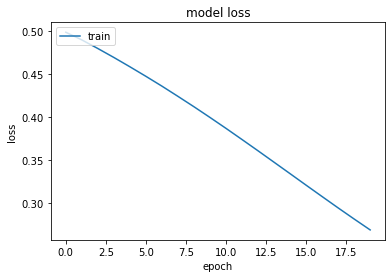

In [19]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()